# Project Nutrino

**The Problem Area:** 
The past decade has seen the individual consumer market become increasingly saturated with online food delivery apps; their expansion only spurred by the onset of the global pandemic. The growth of industry giants such as Uber Eats and Skip the Dishes has not only allowed its users access to hundreds if not thousands of restaurants at their fingertips but also helped the struggling restaurant sector weather the waves of lockdowns, with many restaurants opting to go entirely delivery based. While these food delivery apps do segregate restaurants into specific categories (ex; types of cuisines, dietary restrictions, on sale), they lack detailed specifications and tend to catalogue restaurants wholistically instead of by individual dishes. My team intends to use an open-source API database of the most common restaurant offerings as well as their macro nutrient profile to help recommend offerings which fit into health-conscious consumers’ diet plans.

**Our Target Audience:**
Individuals in Pursuit of a Healthier Lifestyle

Our primary focus is on a demographic of individuals who are actively seeking to adopt a healthier lifestyle. It's a well-established fact that many embark on health and wellness journeys without the essential support systems required for sustainable success. In today's fast-paced world, online food delivery services have emerged as a popular means of meal acquisition. This paradigm shift in food consumption behavior necessitates the development of a sophisticated tool that seamlessly integrates with these services, creating a symbiotic relationship that offers users detailed, goal-specific recommendations.

As a potential investor, it's crucial to recognize the vast market potential that lies within this segment. The fusion of technology and health-conscious consumer behavior presents an exciting opportunity for NourishNavi, a solution poised to revolutionize the way individuals engage with their nutrition, enabling healthier, more informed food choices. We invite you to consider NourishNavi as an investment with the potential to transform the well-being of our target users while capturing a substantial market share in the health and wellness technology landscape.

## EDA Analysis

### Imports and Sanity Checks

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import pickle
import sklearn.metrics

In [2]:
# import nutritionix  (Experimental Work)

In [3]:
# from nutritionix.nutritionix import NutritionixClient (Experimental Work)

In [4]:
# Attemping to implement API fro Nutritionix (work in progress still do not quite understand all of the architecture)
 
#nutritionix = NutritionixClient(
    #application_id='91623d55',
    #api_key='5bd2595b54d7e4e094bdb30ccba81e0d—',
    # debug=True, # defaults to False)

### Data Import

**Informational Note:** Parquet files are smaller than CSV files, and they can be read and written much faster. Parquet files also support nested data structures, which makes them ideal for storing complex data. CSV: CSV is a row-based data format that is simple to read and write.

In [5]:
# The data was availible in both csv and parquet storage types however the csv file was far too large to load into the jupyter system
nutrition = pd.read_parquet('data/recipes.parquet') 
# nutrition.head() Tried this but it didn't show me all the columns

# This setting allows us to see all the columns in a dataframe 
# When there are lots of columns present
pd.set_option('display.max_columns', None)
nutrition.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38.0,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09 21:46:00+00:00,Make and share this Low-Fat Berry Blue Frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,Frozen Desserts,"[Dessert, Low Protein, Low Cholesterol, Health...","[4, 1⁄4, 1, 1]","[blueberries, granulated sugar, vanilla yogurt...",4.5,4.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,None,"[Toss 2 cups berries with sugar., Let stand fo..."
1,39.0,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29 13:12:00+00:00,Make and share this Biryani recipe from Food.com.,[https://img.sndimg.com/food/image/upload/w_55...,Chicken Breast,"[Chicken Thigh & Leg, Chicken, Poultry, Meat, ...","[1, 4, 2, 2, 8, 1⁄4, 8, 1⁄2, 1, 1, 1⁄4, 1⁄4, 1...","[saffron, milk, hot green chili peppers, onion...",3.0,1.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,None,[Soak saffron in warm milk for 5 minutes and p...
2,40.0,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05 19:52:00+00:00,This is from one of my first Good House Keepi...,[https://img.sndimg.com/food/image/upload/w_55...,Beverages,"[Low Protein, Low Cholesterol, Healthy, Summer...","[1 1⁄2, 1, None, 1 1⁄2, None, 3⁄4]","[sugar, lemons, rind of, lemon, zest of, fresh...",4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,None,"[Into a 1 quart Jar with tight fitting lid, pu..."
3,41.0,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03 14:54:00+00:00,This dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,Soy/Tofu,"[Beans, Vegetable, Low Cholesterol, Weeknight,...","[12, 1, 2, 1, 10, 1, 3, 2, 2, 2, 1, 2, 1⁄2, 1⁄...","[extra firm tofu, eggplant, zucchini, mushroom...",4.5,2.0,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"[Drain the tofu, carefully squeezing out exces..."
4,42.0,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19 06:19:00+00:00,Make and share this Cabbage Soup recipe from F...,[https://img.sndimg.com/food/image/upload/w_55...,Vegetable,"[Low Protein, Vegan, Low Cholesterol, Healthy,...","[46, 4, 1, 2, 1]","[plain tomato juice, cabbage, onion, carrots, ...",4.5,11.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,None,"[Mix everything together and bring to a boil.,..."


In [6]:
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   RecipeId                    522517 non-null  float64            
 1   Name                        522517 non-null  object             
 2   AuthorId                    522517 non-null  int32              
 3   AuthorName                  522517 non-null  object             
 4   CookTime                    439972 non-null  object             
 5   PrepTime                    522517 non-null  object             
 6   TotalTime                   522517 non-null  object             
 7   DatePublished               522517 non-null  datetime64[ns, UTC]
 8   Description                 522512 non-null  object             
 9   Images                      522516 non-null  object             
 10  RecipeCategory              521766 non-null 

The recipes dataset contains 522,517 recipes from 312 different categories. This dataset provides information about each recipe like cooking times, servings, ingredients, nutrition, instructions, and more.
The reviews dataset contains 1,401,982 reviews from 271,907 different users. This dataset provides information about the author, rating, review text, and much more. Which is incredible from a data prespective as it gives us ample data to play around and train our algorithms with :)

Now that we know the type of each of our columns, lets further explore what format out data is stored in

In [7]:
nutrition[['CookTime','PrepTime']]

,CookTime,PrepTime
0,PT24H,PT45M
1,PT25M,PT4H
2,PT5M,PT30M
3,PT20M,PT24H
4,PT30M,PT20M
...,...,...
522512,PT35M,PT1H
522513,PT3H,PT30M
522514,PT3H,PT1H
522515,None,PT15M


We can observe that our Cook and Prep times are stored in a format PTXXHXXM which better helps us understand and filter the data if we choose to in the future.

In [8]:
# nutrition.drop(['RecipeId', 'AuthorName', 'AuthorId', 'Images', 'RecipeYield', 'RecipeInstructions','CookTime', 'PrepTime', 'TotalTime'], axis = 1, inplace = True)

In [9]:
# nutrition.info()

In [10]:
# Lets analyze the null values present in our data
nutrition.isna().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                           0
RecipeIngredientQuantities         0
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

In [11]:
# Lets eliminate recipes with no RecipeServings values as 
# We want our algorithm to reccomend dishes with accurate (calroies & macros)/ serving
nutrition = nutrition[nutrition.RecipeServings.notnull()]
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339606 entries, 0 to 522514
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   RecipeId                    339606 non-null  float64            
 1   Name                        339606 non-null  object             
 2   AuthorId                    339606 non-null  int32              
 3   AuthorName                  339606 non-null  object             
 4   CookTime                    287338 non-null  object             
 5   PrepTime                    339606 non-null  object             
 6   TotalTime                   339606 non-null  object             
 7   DatePublished               339606 non-null  datetime64[ns, UTC]
 8   Description                 339602 non-null  object             
 9   Images                      339605 non-null  object             
 10  RecipeCategory              339122 non-null 

In [12]:
# We want our data to be tabulated per serving so as to have accurate macro ratios
# So lets clean our data respectively by casting it into new columns
nutrition['Protein/Serving']= nutrition['ProteinContent']/nutrition['RecipeServings']
nutrition['Calories/Serving']= nutrition['Calories']/nutrition['RecipeServings']
nutrition['FatContent/Serving']= nutrition['FatContent']/nutrition['RecipeServings']
nutrition['SaturatedFatContent/Serving']= nutrition['SaturatedFatContent']/nutrition['RecipeServings']
nutrition['CholesterolContent/Serving']= nutrition['CholesterolContent']/nutrition['RecipeServings']
nutrition['SodiumContent/Serving']= nutrition['SodiumContent']/nutrition['RecipeServings']
nutrition['CarbohydrateContent/Serving']= nutrition['CarbohydrateContent']/nutrition['RecipeServings']
nutrition['FiberContent/Serving']= nutrition['FiberContent']/nutrition['RecipeServings']
nutrition['SugarContent/Serving']= nutrition['SugarContent']/nutrition['RecipeServings']
nutrition = nutrition.round(2)
# Using samples we can clearly see a more relevant macros spread
nutrition.head()


,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions,Protein/Serving,Calories/Serving,FatContent/Serving,SaturatedFatContent/Serving,CholesterolContent/Serving,SodiumContent/Serving,CarbohydrateContent/Serving,FiberContent/Serving,SugarContent/Serving
0,38.0,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09 21:46:00+00:00,Make and share this Low-Fat Berry Blue Frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,Frozen Desserts,"[Dessert, Low Protein, Low Cholesterol, Health...","[4, 1⁄4, 1, 1]","[blueberries, granulated sugar, vanilla yogurt...",4.5,4.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,None,"[Toss 2 cups berries with sugar., Let stand fo...",0.80,42.72,0.62,0.32,2.00,7.45,9.28,0.90,7.55
1,39.0,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29 13:12:00+00:00,Make and share this Biryani recipe from Food.com.,[https://img.sndimg.com/food/image/upload/w_55...,Chicken Breast,"[Chicken Thigh & Leg, Chicken, Poultry, Meat, ...","[1, 4, 2, 2, 8, 1⁄4, 8, 1⁄2, 1, 1, 1⁄4, 1⁄4, 1...","[saffron, milk, hot green chili peppers, onion...",3.0,1.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,None,[Soak saffron in warm milk for 5 minutes and p...,10.57,185.12,9.80,2.77,62.13,61.40,14.07,1.50,3.40
2,40.0,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05 19:52:00+00:00,This is from one of my first Good House Keepi...,[https://img.sndimg.com/food/image/upload/w_55...,Beverages,"[Low Protein, Low Cholesterol, Healthy, Summer...","[1 1⁄2, 1, None, 1 1⁄2, None, 3⁄4]","[sugar, lemons, rind of, lemon, zest of, fresh...",4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,None,"[Into a 1 quart Jar with tight fitting lid, pu...",0.08,77.78,0.05,0.00,0.00,0.45,20.38,0.10,19.30
3,41.0,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03 14:54:00+00:00,This dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,Soy/Tofu,"[Beans, Vegetable, Low Cholesterol, Weeknight,...","[12, 1, 2, 1, 10, 1, 3, 2, 2, 2, 1, 2, 1⁄2, 1⁄...","[extra firm tofu, eggplant, zucchini, mushroom...",4.5,2.0,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"[Drain the tofu, carefully squeezing out exces...",14.65,268.05,12.00,1.90,0.00,779.30,32.10,8.65,16.05
4,42.0,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19 06:19:00+00:00,Make and share this Cabbage Soup recipe from F...,[https://img.sndimg.com/food/image/upload/w_55...,Vegetable,"[Low Protein, Vegan, Low Cholesterol, Healthy,...","[46, 4, 1, 2, 1]","[plain tomato juice, cabbage, onion, carrots, ...",4.5,11.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,None,"[Mix everything together and bring to a boil.,...",1.08,25.90,0.10,0.02,0.00,239.82,6.28,1.20,4.42


In [13]:
# Lets now drop the columns that have become redundant
nutrition.drop(['SugarContent','FatContent','SaturatedFatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent','ProteinContent'],axis = 1,inplace=True)

In [14]:
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339606 entries, 0 to 522514
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype              
---  ------                       --------------   -----              
 0   RecipeId                     339606 non-null  float64            
 1   Name                         339606 non-null  object             
 2   AuthorId                     339606 non-null  int32              
 3   AuthorName                   339606 non-null  object             
 4   CookTime                     287338 non-null  object             
 5   PrepTime                     339606 non-null  object             
 6   TotalTime                    339606 non-null  object             
 7   DatePublished                339606 non-null  datetime64[ns, UTC]
 8   Description                  339602 non-null  object             
 9   Images                       339605 non-null  object             
 10  RecipeCategory               339

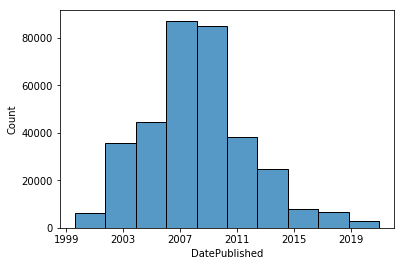

In [15]:
# Lets visualize when most of these dishes were added to the dataset
sns.histplot(nutrition['DatePublished'], bins=10)

In [16]:
# To ensure that all recipes are up to date 
# lets isolate recipes from the past 20 years beacuse you know 
# people were adding cocaine to their food back in the day and while
# It serves as a stimulating ingrediant its hard to find at local supermarkets
nutrition = nutrition.loc[nutrition['DatePublished']>= '2003-01-01']

In [17]:
# Lets check for outliers in macro content and isolate for values that are realistic
nutrition.describe()


,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,RecipeServings,Protein/Serving,Calories/Serving,FatContent/Serving,SaturatedFatContent/Serving,CholesterolContent/Serving,SodiumContent/Serving,CarbohydrateContent/Serving,FiberContent/Serving,SugarContent/Serving
count,312084.000000,3.120840e+05,151102.000000,154293.000000,312084.000000,312084.000000,312084.000000,312084.000000,312084.000000,312084.000000,312084.000000,312084.000000,312084.000000,312084.000000,312084.000000
mean,302163.336826,5.733579e+07,4.634108,4.311809,366.108019,8.672841,4.158571,100.414906,4.872296,1.836700,18.979623,170.360839,9.747245,0.879657,3.960832
std,141391.661535,3.270809e+08,0.640431,14.524564,896.232853,118.866247,11.094519,826.158475,17.060330,7.091346,84.391944,2155.057460,197.020073,4.199039,164.023957
min,49723.000000,1.533000e+03,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,181016.750000,1.188400e+05,4.500000,1.000000,165.400000,4.000000,0.420000,22.260000,0.660000,0.180000,0.370000,14.890000,1.650000,0.100000,0.350000
50%,303551.500000,2.874200e+05,5.000000,2.000000,288.800000,6.000000,1.600000,51.200000,2.040000,0.670000,5.980000,52.980000,4.040000,0.330000,0.980000
75%,424732.250000,6.287790e+05,5.000000,4.000000,458.300000,8.000000,5.220000,102.250000,4.750000,1.770000,19.400000,143.020000,8.760000,0.880000,2.520000
max,541381.000000,2.002882e+09,5.000000,1657.000000,434360.200000,32767.000000,1980.800000,434360.200000,1922.000000,960.700000,32614.100000,704129.600000,108294.600000,1748.600000,90682.300000


In [18]:
# Lets check for outliers in macro content and isolate for values that are realistic
nutrition = nutrition.loc[nutrition['Protein/Serving'] <= 100]
nutrition = nutrition.loc[nutrition['Calories/Serving'] <= 2500]
nutrition = nutrition.loc[nutrition['FatContent/Serving'] <= 250]
nutrition = nutrition.loc[nutrition['SaturatedFatContent/Serving'] <= 250]
nutrition = nutrition.loc[nutrition['CholesterolContent/Serving'] <= 600]
nutrition = nutrition.loc[nutrition['SodiumContent/Serving'] <= 6000]
nutrition = nutrition.loc[nutrition['CarbohydrateContent/Serving'] <= 1000]
nutrition = nutrition.loc[nutrition['FiberContent/Serving'] <= 100]
nutrition = nutrition.loc[nutrition['SugarContent/Serving'] <= 500]

These cut off values are based on research from the American Nutrition Association which indicated the upper range of macronutrients counts in the majority of dishes which are consumed in North America 

In [19]:
nutrition.describe()

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,RecipeServings,Protein/Serving,Calories/Serving,FatContent/Serving,SaturatedFatContent/Serving,CholesterolContent/Serving,SodiumContent/Serving,CarbohydrateContent/Serving,FiberContent/Serving,SugarContent/Serving
count,310650.000000,3.106500e+05,150591.000000,153753.000000,310650.000000,310650.000000,310650.000000,310650.000000,310650.000000,310650.000000,310650.000000,310650.000000,310650.000000,310650.000000,310650.000000
mean,301991.582997,5.698148e+07,4.634387,4.315493,351.580125,8.706792,3.829485,86.699372,4.238248,1.581327,16.724010,126.692229,8.023072,0.797063,2.897558
std,141335.705641,3.260772e+08,0.639644,14.542672,303.464448,119.139210,6.011414,135.749026,8.409551,3.423896,35.211751,266.098914,16.889527,1.752836,10.199571
min,49723.000000,1.533000e+03,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180873.500000,1.188400e+05,4.500000,1.000000,165.000000,4.000000,0.420000,22.160000,0.660000,0.180000,0.370000,14.790000,1.650000,0.100000,0.350000
50%,303340.500000,2.874200e+05,5.000000,2.000000,287.800000,6.000000,1.580000,50.880000,2.020000,0.660000,5.930000,52.490000,4.020000,0.330000,0.970000
75%,424460.750000,6.282790e+05,5.000000,4.000000,455.700000,8.000000,5.160000,101.320000,4.700000,1.750000,19.270000,141.195000,8.680000,0.870000,2.500000
max,541381.000000,2.002882e+09,5.000000,1657.000000,16758.800000,32767.000000,100.000000,2498.500000,247.100000,154.400000,598.600000,5959.400000,540.600000,91.430000,499.100000


### Post Cleaning Data Analysis

RecipeId: The dataset includes 310,650 unique RecipeId entries.

AuthorId: AuthorId values range widely, indicating a diverse set of authors contributing recipes.

AggregatedRating: The average aggregated rating of recipes is approximately 4.63, suggesting that, on average, recipes are well-received.

ReviewCount: The number of reviews for recipes varies, with an average of approximately 4.32 reviews per recipe.

Calories: The average calorie count per recipe is approximately 351.58, with a wide range of values. The minimum calorie count is 0, which may indicate some recipes with missing or incomplete data.

RecipeServings: The average number of servings per recipe is around 8.71, indicating that recipes generally serve multiple people.

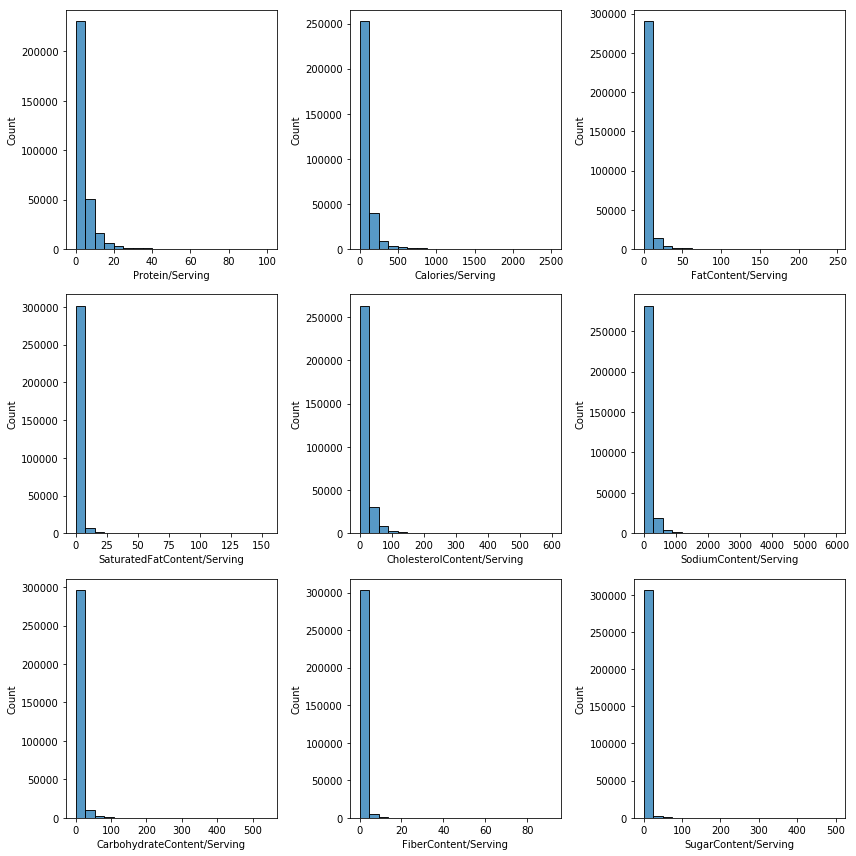

In [20]:
plt.subplots(3, 3, figsize = (12,12))  

plt.subplot(3, 3, 1)  
sns.histplot(nutrition['Protein/Serving'], bins=20)

plt.subplot(3, 3, 2)  
sns.histplot(nutrition['Calories/Serving'], bins=20)

plt.subplot(3, 3, 3)  
sns.histplot(nutrition['FatContent/Serving'], bins=20)

plt.subplot(3, 3, 4)  
sns.histplot(nutrition['SaturatedFatContent/Serving'], bins=20)

plt.subplot(3, 3, 5)  
sns.histplot(nutrition['CholesterolContent/Serving'], bins=20)

plt.subplot(3, 3, 6)
sns.histplot(nutrition['SodiumContent/Serving'], bins=20)

plt.subplot(3, 3, 7)  
sns.histplot(nutrition['CarbohydrateContent/Serving'], bins=20)

plt.subplot(3, 3, 8)  
sns.histplot(nutrition['FiberContent/Serving'], bins=20)

plt.subplot(3, 3, 9)
sns.histplot(nutrition['SugarContent/Serving'], bins=20)

plt.tight_layout()  # Makes sure there is no overlap in plots

plt.show()

In [21]:
# Now that our database has been cleaned and established lets try to understand the correlation between macros
nutrition.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,RecipeServings,RecipeYield,RecipeInstructions,Protein/Serving,Calories/Serving,FatContent/Serving,SaturatedFatContent/Serving,CholesterolContent/Serving,SodiumContent/Serving,CarbohydrateContent/Serving,FiberContent/Serving,SugarContent/Serving
45729,49723.0,Maple Bacon Wrapped Scallops W/ Water Chestnuts,26278,Aroostook,PT6M,PT10M,PT16M,2003-01-03 19:59:00+00:00,These little hummers are enough to make your m...,[],Winter,"[Christmas, < 30 Mins, For Large Groups, Oven,...","[1, 12, 1, 1⁄2, 1⁄2, None]","[water chestnuts, scallops, bacon, maple syrup...",NaN,NaN,116.6,24.0,None,[Marinate waterchestnut in maple syrup and soy...,0.17,4.86,0.36,0.12,0.64,21.08,0.24,0.00,0.18
45730,49724.0,Budget Seasoned Steak,64434,abcdefg,PT15M,PT2M,PT17M,2003-01-03 20:00:00+00:00,"This is the easiest steak recipe in the world,...",[],Meat,"[< 30 Mins, Beginner Cook, Stove Top, Easy, In...","[2, 3, 3⁄4]",[water],5.0,1.0,738.9,2.0,None,"[Mix ramen seasoning, water., Place steaks in ...",31.85,369.45,25.90,10.10,111.05,80.20,0.00,0.00,0.00
45733,49727.0,Easy Garlic/Dill potatoes,9178,NICK SUHADOLNIK,PT20M,PT10M,PT30M,2003-01-03 20:00:00+00:00,"This dish goes so well with my ""Standing Rib R...",[],Potato,"[Vegetable, Low Protein, < 30 Mins, Stove Top,...","[4, 1⁄2, 4 -6, 1, 3⁄4, None, None]","[potatoes, yellow onion, garlic, salt, dried d...",4.5,3.0,142.3,6.0,None,"[Add cubed potatoes, onion, garlic, and salt t...",0.50,23.72,0.98,0.60,3.30,67.70,3.37,0.40,0.20
45734,49728.0,Sacrilegious Swiss Fondue,59064,Missy Wombat,PT4H,PT45M,PT4H45M,2003-01-03 20:00:00+00:00,My other half has a Swiss heritage. I wanted t...,[],One Dish Meal,"[Cheese, Swiss, European, Kid Friendly, High I...","[1, 1 1⁄2, 3, 2 1⁄2, 1]","[garlic, cheese, flour, dry white wine, dry mu...",NaN,NaN,474.2,6.0,None,[Rub the garlic on the inside of the crockpot ...,3.82,79.03,4.65,2.90,12.10,183.42,2.55,0.03,0.17
45736,49730.0,Asparagus Fettuccine Bake,29956,Sueie,PT30M,PT10M,PT40M,2003-01-03 20:01:00+00:00,"Easy, low fat fettucine bake. Ham can be omitt...",[],One Dish Meal,"[Vegetable, < 60 Mins]","[2, 1⁄2, 1, 1, 2, 2, 1⁄3, 1, None]","[asparagus spears, fettuccine pasta, ham, fres...",NaN,NaN,145.7,4.0,None,"[Preheat oven to moderate., To make sauce, mel...",3.62,36.42,0.98,0.50,4.72,119.48,3.45,0.48,0.32


In [79]:
#Macronutrient Correlation Matrix
correlation = nutrition.iloc[:,20:28].corr()
correlation.style.background_gradient(cmap='coolwarm')

,Protein/Serving,Calories/Serving,FatContent/Serving,SaturatedFatContent/Serving,CholesterolContent/Serving,SodiumContent/Serving,CarbohydrateContent/Serving,FiberContent/Serving
Protein/Serving,1.000000,0.712564,0.586827,0.524225,0.651590,0.576678,0.429142,0.435461
Calories/Serving,0.712564,1.000000,0.845526,0.754213,0.548260,0.556882,0.784398,0.563247
FatContent/Serving,0.586827,0.845526,1.000000,0.864736,0.564068,0.474230,0.397158,0.352628
SaturatedFatContent/Serving,0.524225,0.754213,0.864736,1.000000,0.602712,0.415752,0.380690,0.284020
CholesterolContent/Serving,0.651590,0.548260,0.564068,0.602712,1.000000,0.402412,0.240348,0.162264
SodiumContent/Serving,0.576678,0.556882,0.474230,0.415752,0.402412,1.000000,0.399112,0.341499
CarbohydrateContent/Serving,0.429142,0.784398,0.397158,0.380690,0.240348,0.399112,1.000000,0.637250
FiberContent/Serving,0.435461,0.563247,0.352628,0.284020,0.162264,0.341499,0.637250,1.000000


### Matrix Analysis:
This correlation matrix offers valuable insights into the relationships between various nutritional components per serving of a food item. Notably, there are several positive correlations of moderate to strong magnitude. For instance, there are positive associations between protein content per serving and calories (0.713), fat content (0.587), saturated fat content (0.524), cholesterol content (0.652), and sodium content (0.577). This suggests that foods with higher protein content often contain more calories and tend to be richer in fats, saturated fats, cholesterol, and sodium. Additionally, there are robust positive correlations between calories per serving and fat content (0.846) and carbohydrate content (0.784), indicating that foods with higher calorie counts are likely to be higher in fat and carbohydrates. Moreover, a strong positive correlation between fat content and saturated fat content (0.865) underscores their interdependence. On the other hand, fiber content shows moderate positive correlations with both carbohydrate content (0.637) and protein content (0.435), implying that fiber-rich foods tend to have higher carbohydrate and protein contents. Overall, this data analysis reveals significant associations between these nutritional components, which can be valuable for dietary planning and understanding the nutritional profiles of various food items.

## Model Training

Given that a portion of our dataset consists of numerical data, let's explore a straightforward Euclidean distance approach to identifying the most similar match to our input parameters.

In [ ]:
# Create target marcos for your meals
Calorie_Target = 300
Protein_Target = 10

Target_point = np.array([Calorie_Target, Protein_Target])

points = nutrition[["Calories/Serving", "Protein/Serving"]]

# calculate the distances for each row all at once
# using the L2 norm.
distances = np.linalg.norm(Target_point - points, axis=1)

idx = distances.argsort()
idx = idx[:3]
min_index = np.argmin(distances)

mini_df = nutrition.iloc[idx,[0,1,6,17,20,21,22,23,24,25,26,27,28]]

#print(f"Top 3 Recommended Dishes: \n {nutrition.iloc[idx, [0,1,6,17,20,21,22,23,24,25,26,27,28]]}")  
mini_df.head()


We can see that a simple linear distance formula is very effcient in reccomended the closest matches to our input especially when the number of input variables is restricted to 2

### NLP Data Modeling

To handle the non-numeric segment of our dataset, we will employ a tfidfvectorizer in conjunction with a tokenizer that includes English stop words. This will help us preprocess our columns in readiness for implementing our Nearest Neighbor model.

In [24]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split
X = nutrition['Keywords'].astype('string')
stemmer = nltk.stem.PorterStemmer()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
nltk.download('stopwords')
from nltk.corpus import stopwords 

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khanr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5,
                        tokenizer=my_tokenizer)
tfidf.fit(X)

X_train_transformed = tfidf.transform(X)

C:\Users\khanr\anaconda3\envs\python-cvcourse\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


### Why are we using a KNN model?
The Nearest Neighbors algorithm is a versatile choice for non-numerical data due to its adaptability and simplicity. Unlike many algorithms, K-NN doesn't make strong assumptions about data distribution and offers the flexibility of choosing distance metrics suitable for non-numeric data types, including text which is critical in this case as it needs to process "text" data. It's a non-parametric method that is easy to implement and works effectively with high-dimensional data, making it applicable to tasks like text classification and recommendation systems. Additionally, K-NN can be robust to outliers and provides interpretable results, which are valuable when dealing with non-numerical data to identify similar items or documents based on their content.

However, it's essential to keep in mind that K-NN has its limitations, such as sensitivity to the choice of k (number of neighbors) and computational efficiency concerns with large datasets. Effective preprocessing and feature engineering for non-numeric data are crucial to harness the full potential of K-NN in tasks involving non-numeric data analysis, recommendation, or classification.

In [28]:
from sklearn.neighbors import NearestNeighbors

nn_model = NearestNeighbors(n_neighbors=5, metric="cosine")
nn_model.fit(X_train_transformed)

NearestNeighbors(metric='cosine')

In order to evaluate our algorithm, we need to provide the model with a search term that has been transformed in a manner consistent with how the training data was processed. This ensures that the model can accurately interpret the input.

In [66]:
search_terms = ['Vegan']
search_terms_transformed = tfidf.transform(search_terms)

dist, neighbour_ind = nn_model.kneighbors(search_terms_transformed)
idx = neighbour_ind[0].astype(int)
print(f"\nTop 3 Closest Fits are:\n {X.iloc[neighbour_ind[0][0]]} \n {X.iloc[neighbour_ind[0][1]]} \n{X.iloc[neighbour_ind[0][2]]}")
recomendations = nutrition.iloc[idx]
recomendations_query = recomendations['Keywords']
#print(recomendations_query)
recomendations


Top 3 Closest Fits are:
 ['Vegan'] 
 ['Vegan'] 
['Vegan']


,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,RecipeServings,RecipeYield,RecipeInstructions,Protein/Serving,Calories/Serving,FatContent/Serving,SaturatedFatContent/Serving,CholesterolContent/Serving,SodiumContent/Serving,CarbohydrateContent/Serving,FiberContent/Serving,SugarContent/Serving
383617,397425.0,Vegan Baked Beans a La Crock Pot,953275,magpie diner,PT8H,PT30M,PT8H30M,2009-11-02 13:58:00+00:00,At the time I'm posting this there are two oth...,[https://img.sndimg.com/food/image/upload/w_55...,One Dish Meal,[Vegan],"[2, 1⁄3, 1⁄4, 1, 1⁄4, 2, 3, 3, 2, 4, 1, None, ...","[dried navy beans, unsulphured molasses, brown...",4.5,2.0,353.8,6.0,None,[Night before: Soak the beans in plenty of wa...,2.82,58.97,0.28,0.02,0.00,67.30,11.77,3.02,3.93
189491,197938.0,Ready and Waiting Bean and Vegetable Ragout,37779,ratherbeswimmin,PT8H,PT45M,PT8H45M,2006-11-27 17:14:00+00:00,Make and share this Ready and Waiting Bean and...,[],Vegetable,[Vegan],"[2, 1, 1, 1, 1, 1, 1, 2, 1⁄2, 1, 1, 1⁄4, 1]","[olive oil, yellow onion, carrot, turnip, pars...",5.0,5.0,165.4,6.0,None,[Heat oil in a large skillet over medium heat;...,0.92,27.57,0.87,0.13,0.00,108.65,3.67,1.12,0.85
466328,483511.0,Northstar Cafe Veggie Burger,1405684,Mark S.,PT15M,PT5H,PT5H15M,2012-07-16 09:41:00+00:00,Source: http://www.dispatch.com/content/storie...,[],Lunch/Snacks,[Vegan],"[1 1⁄4, 1, 1, 1⁄2, None, 1, 1⁄2, 1, 3, 2, 1, 1...","[cooked brown rice, beet, salt, fresh ground b...",NaN,NaN,368.1,4.0,4 Burgers,"[In a food processor, pulse rice, lentils and ...",3.62,92.02,2.22,0.45,11.62,159.90,14.80,2.15,2.05
374113,387642.0,Jalapeno-Lime-Garlic Jelly,461283,Penny Stettinius,PT24H,PT30M,PT24H30M,2009-08-29 13:29:00+00:00,This is the ultimate flavor combination. Uses ...,[],Jellies,[Vegan],"[1, 6 -8, 3, 5, 2, 2]","[garlic cloves, limes, sugar, apple cider vine...",3.0,3.0,838.7,5.0,5 cups,"[Sterilize 8 - 8 oz jelly jars and lids., Wash...",0.34,167.74,0.14,0.02,0.00,1.42,42.32,0.74,40.82
360786,373966.0,Flour-Free Falafel,947311,schmme,PT25M,PT24H,PT24H25M,2009-05-23 18:05:00+00:00,Make and share this Flour-Free Falafel recipe ...,[],Beans,[Vegan],"[1 3⁄4, 2, 1, 1, 1, 1, 1, 1⁄2, 1⁄2, 1, None]","[dried garbanzo beans, garlic cloves, onion, g...",NaN,NaN,12.7,6.0,6,[Soak chickpeas in 4 inches of water for 24 ho...,0.08,2.12,0.05,0.00,0.00,82.68,0.42,0.10,0.10


Now lets view the names of the top 5 dishes our algorithm reccomended

In [73]:
nutrition.iloc[neighbour_ind[0][0:5]]['Name']

383617               Vegan Baked Beans a La Crock Pot
189491    Ready and Waiting Bean and Vegetable Ragout
466328                   Northstar Cafe Veggie Burger
374113                     Jalapeno-Lime-Garlic Jelly
360786                             Flour-Free Falafel
Name: Name, dtype: object

To optimize the deployment of our model in a live environment, we should consider pickling it, eliminating the need for retraining every time.

In [74]:
#pickle.dump(nn_model, open('model.pkl','wb'))

# Validation and Model Evaluation:

So heres the million dollar question how do we evaluate our model given that all of our data is unlabled and we cannot use perscion, F1 score, or recall to evaluate our model?


Evaluating the accuracy of models on unlabeled data can be challenging due to the absence of ground truth labels. However, several strategies can assess model performance effectively. Clustering evaluation metrics like Silhouette Score and Davies-Bouldin Index provide quantitative insights into how well unsupervised models group similar data points and separate dissimilar ones. Visual techniques such as scatter plots and dimensionality reduction methods like PCA allow for visual exploration of data structures. Domain expertise can offer valuable qualitative assessments, ensuring that discovered patterns align with domain expectations. Internal validation techniques tailored to specific methods help gauge the quality and interpretability of model outputs, contributing to a holistic evaluation process.

Assessing model accuracy on unlabeled data involves a combination of quantitative metrics, visual exploration, domain expertise, and internal validation techniques. This multifaceted approach ensures a thorough evaluation and enhances our understanding of the discovered patterns and clusters in unlabeled datasets.


A potential solution to this problem would be to start labeling output of my model as either good or bad which would create a feeback loop for my model to train on however this method is very time consuming. Instead based on my research, I decided to u sthe gower distance to evaluate how close the output of my model was to my input

Gower distance is an effective choice for non-numerical data like text because it handles mixed data types, including numerical and categorical attributes, simultaneously. It quantifies the dissimilarity between pairs of data points, ranging from 0 (complete similarity) to 1 (maximum dissimilarity). Its flexibility allows for customized distance measures, making it adaptable to different attribute types within a dataset. Gower distance is also robust to missing values, common in real-world datasets. It provides interpretable results when applied to text data, making it valuable for tasks like document clustering and topic modeling, demonstrating its versatility in various data analysis applications beyond text data.

In [81]:
import numpy as np
from scipy.spatial import distance



# Gower distance function
def gower_distance(search_terms, recommended_items,):
    # Gower distance requires a distance matrix, so we create one
    ground_truth_list = list(search_terms)
    recommended_items_list = list(recommended_items)


    
    matrix = np.array([[1 if a == b else 0 for a in search_terms] for b in recommended_items])
    return 1 - np.sum(matrix) / len(search_terms)

# Calculate Gower distance
gower_dist = gower_distance(search_terms, recomendations_query)
print(f"Gower Distance: {gower_dist}")

Gower Distance: -4.0
